In [79]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

# general libraries
import os  # make folders for file output
import h5py as h5
import json

from analysis import *
from general_utils import *

In [15]:
%matplotlib notebook
plt.rcParams.update({"figure.max_open_warning": 0})

In [65]:
data_path = "/mnt/Data/NEURONoutput/sac_net/committee_runs/voltage_clamp/"
conds = ["control", "non_ds_ach_50pr", "non_ds_ach_70pr"]
data = {c: load_sac_rho_data(os.path.join(data_path, c + "/")) for c in conds}
transmitters = [k for k in data["control"]["0.90"][0]["soma"].keys()]
dir_labels = [225, 270, 315, 0, 45, 90, 135, 180]

control = load_sac_rho_data(os.path.join(data_path, "control/"))
non50 = load_sac_rho_data(os.path.join(data_path, "non_ds_ach_50pr/"))
non70 = load_sac_rho_data(os.path.join(data_path, "non_ds_ach_70pr/"))
control_params = data["control"]["0.90"][0]["params"]

trial_avgs = {
    cond: {
        rho: {
            n: {trans: np.mean(rec, axis=0) for trans, rec in net["soma"].items()}
            for n, net in nets.items()
        }
        for rho, nets in rhos.items()      
    }
    for cond, rhos in data.items()
}
    
net_avgs = {
    cond: {
        rho: {
            trans: np.mean([net[trans] for net in nets.values()], axis=0)
            for trans in transmitters
        }
        for rho, nets in rhos.items()
    }
    for cond, rhos in trial_avgs.items()
}

In [66]:
xaxis = np.arange(int(350 / 0.1) + 1) * control_params["dt"]

<IPython.core.display.Javascript object>


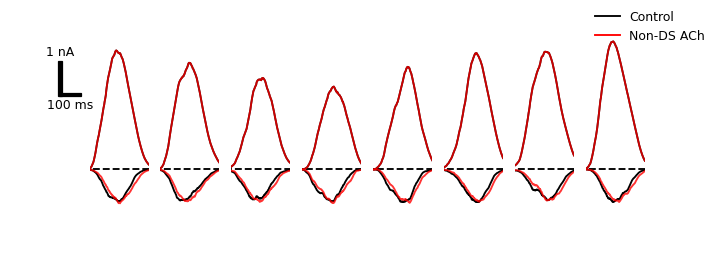

(30.0, 300.0)

In [129]:
net_avg_fig, net_avg_ax = plt.subplots(
    1, len(dir_labels), sharex=True, sharey=True, figsize=(8, 3))

for i, ax in enumerate(net_avg_ax):
    ax.plot([xaxis[0], xaxis[-1]], [0., 0.], c="black", linestyle="--")
    ax.plot(xaxis, net_avgs["control"]["0.90"]["E"][i], c="black")
    ax.plot(xaxis, net_avgs["control"]["0.90"]["GABA"][i], c="black")
    ax.plot(xaxis, net_avgs["non_ds_ach_50pr"]["0.90"]["E"][i], c="red", alpha=0.8)
    ax.plot(xaxis, net_avgs["non_ds_ach_50pr"]["0.90"]["GABA"][i], c="red", alpha=0.8)

clean_axes(net_avg_ax, remove_spines=["left", "right", "top", "bottom"])
time_bar = AnchoredSizeBar(
    net_avg_ax[0].transData,
    100,
    "100 ms",
    "lower right",
    pad=0.1,
    color="black",
    bbox_to_anchor=(0.1, 0.6),
    bbox_transform=net_avg_ax[0].transAxes,
    frameon=False,
    size_vertical=0.1,
)
# these currents seem crazy, try re-running of the model with weaker weights
amp_bar = AnchoredSizeBar(
    net_avg_ax[0].transData,
    15,
    "1 nA",
    "center",
    pad=0.1,
    color="black",
    bbox_to_anchor=(-0.5, 0.81),
    bbox_transform=net_avg_ax[0].transAxes,
    frameon=False,
    size_vertical=1.,
    label_top=True,
)

time_bar.set_clip_on(False)
amp_bar.set_clip_on(False)
net_avg_ax[0].add_artist(time_bar)
net_avg_ax[0].add_artist(amp_bar)

black_control = net_avg_ax[-1].plot([], [], c="black", label="Control")
red_nonds = net_avg_ax[-1].plot([], [], c="red", label="Non-DS ACh")
net_avg_fig.legend(frameon=False)

red_nonds
net_avg_ax[-1].set_ylim(-2, 4)
net_avg_ax[-1].set_xlim(30, 300)

In [44]:
control_dirs_e = np.mean(control["0.90"][0]["soma"]["E"], axis=0)
control_dirs_i = np.mean(control["0.90"][0]["soma"]["GABA"], axis=0)
non50_dirs_e = np.mean(non50["0.90"][0]["soma"]["E"], axis=0)
non50_dirs_i = np.mean(non50["0.90"][0]["soma"]["GABA"], axis=0)
non70_dirs_e = np.mean(non70["0.90"][0]["soma"]["E"], axis=0)
non70_dirs_i = np.mean(non70["0.90"][0]["soma"]["GABA"], axis=0)

<IPython.core.display.Javascript object>


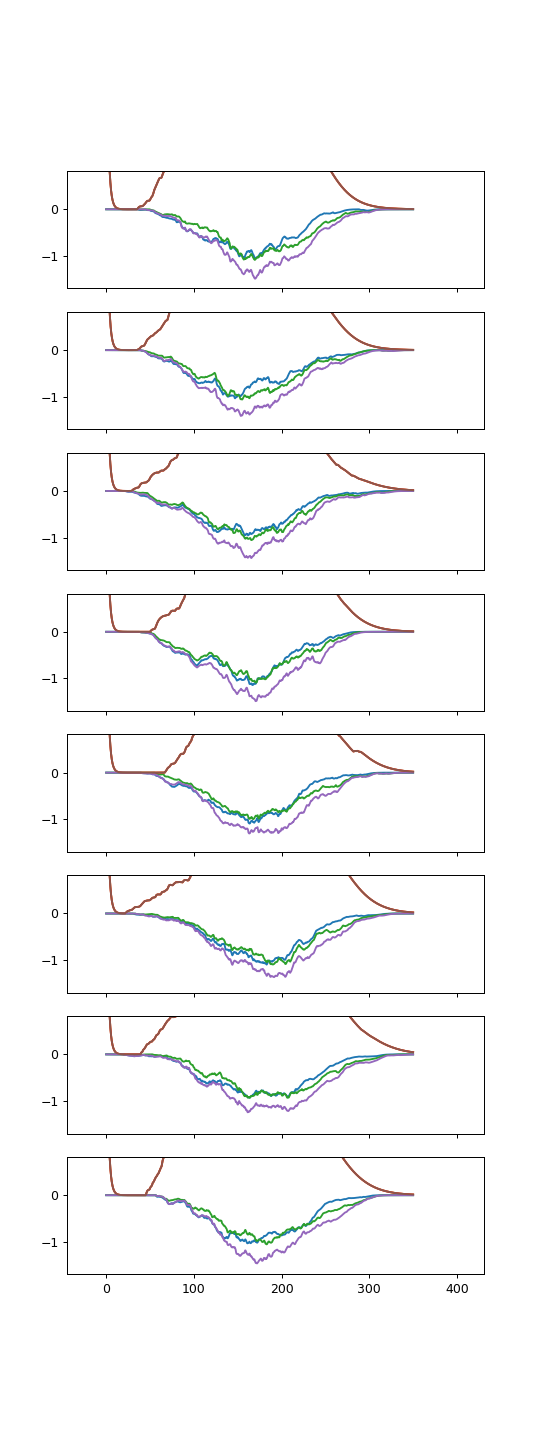

(50.0, 300.0)

In [49]:
ff, aa = plt.subplots(8, sharex=True, sharey=True, figsize=(6, 16))
for a, ce, ci, n50e, n50i, n70e, n70i in zip(
    aa, control_dirs_e, control_dirs_i, non50_dirs_e, non50_dirs_i, non70_dirs_e, non70_dirs_i
):
    a.plot(xaxis, ce)
    a.plot(xaxis, ci)
    a.plot(xaxis, n50e)
    a.plot(xaxis, n50i)
    a.plot(xaxis, n70e)
    a.plot(xaxis, n70i)
    
aa[-1].set_ylim(-3, 5)
aa[-1].set_xlim(50, 300)

In [50]:
np.sum(control_dirs_e)

-9498.326783333334

In [52]:
np.sum(non50_dirs_e)

-9696.131940000001

In [53]:
np.sum(non70_dirs_e)

-13505.558633333334